In [2]:
#import the necessary modules
import pandas as pd #data manipulation
from pandas.plotting import lag_plot #checks patterns in the series
import matplotlib.pyplot as plt#for data visualization
import numpy as np#calculations
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


#load the dataset
dataset = pd.read_csv("/home/queen/Desktop/python/fproject/NSE-Tata-Limited.csv", index_col = 'Date', parse_dates = True)
dataset.head()


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [3]:
#decribe the data
dataset.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [4]:
#summary statistics
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2018-10-08 to 2013-10-08
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  1235 non-null   float64
 1   High                  1235 non-null   float64
 2   Low                   1235 non-null   float64
 3   Last                  1235 non-null   float64
 4   Close                 1235 non-null   float64
 5   Total Trade Quantity  1235 non-null   float64
 6   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7)
memory usage: 77.2 KB


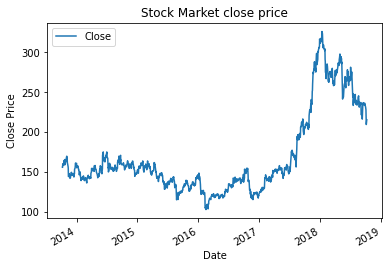

In [5]:
#data analysis/visualization
dataset[['Close']].plot()
plt.title("Stock Market close price")
plt.xlabel("Date")
plt.ylabel('Close Price')
plt.show()

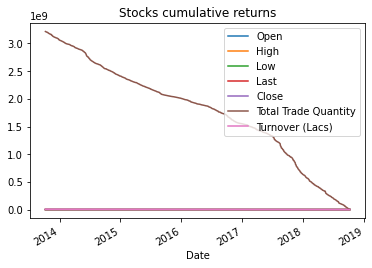

In [6]:
#calculate the cumulative return of the company stocks
cr = dataset.cumsum()
cr.plot()
plt.title("Stocks cumulative returns")
plt.show()

Text(0.5, 1.0, 'Autocorrection plot')

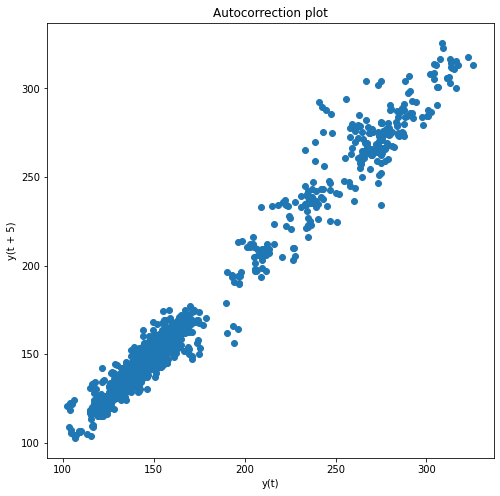

In [7]:
#autocorrection plot
plt.figure(figsize=(8,8))
lag_plot(dataset['Close'], lag = 5)
plt.title("Autocorrection plot")

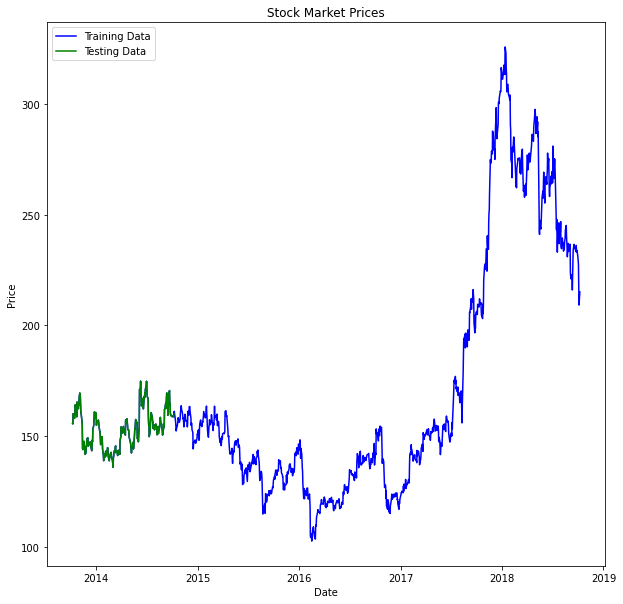

In [8]:
#train and test set
train_data, test_data = dataset[0:int(len(dataset)*0.8)], dataset[int(len(dataset)*0.8):]
plt.figure(figsize= (10,10))
plt.title("Stock Market Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(dataset['Close'], 'blue', label = 'Training Data')
plt.plot(test_data['Close'], 'green', label = 'Testing Data')
plt.legend()

In [9]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [10]:
import warnings
warnings.filterwarnings('ignore')
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 7.950
Symmetric mean absolute percentage error: 6.544


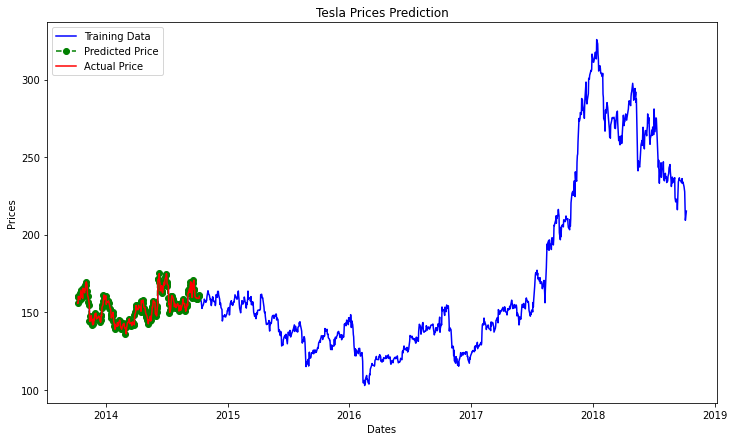

In [11]:
plt.figure(figsize=(12,7))
plt.plot(dataset['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

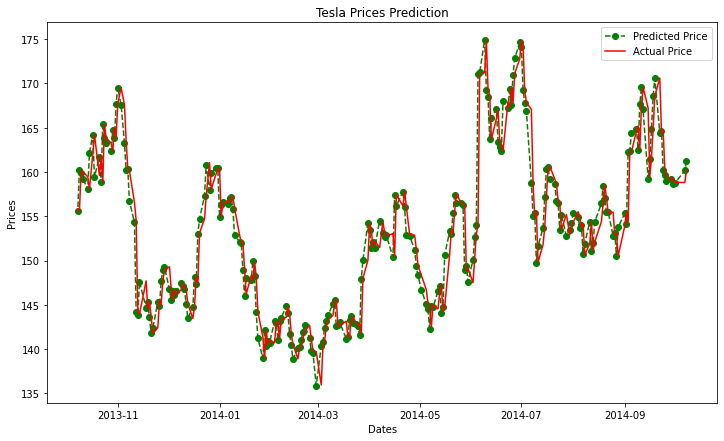

In [12]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [17]:
from statsmodels.tsa.arima_model import ARIMAResults
model_fit.save("model.h5")

loaded = ARIMAResults.load("model.h5")